[[649.78255154   0.         143.00123024]
 [  0.         649.78255154 155.0463047 ]
 [  0.           0.           1.        ]]
(100, 200, 200, 3)
(100, 200, 200, 1)
0


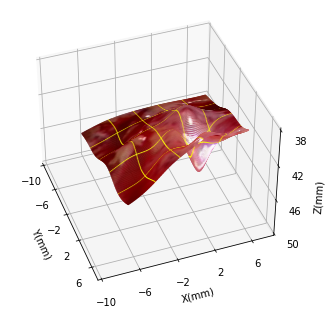

1


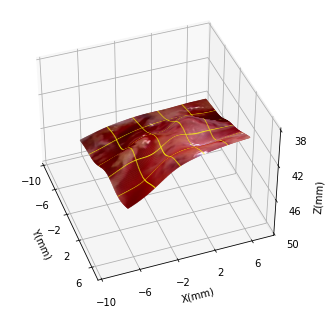

2


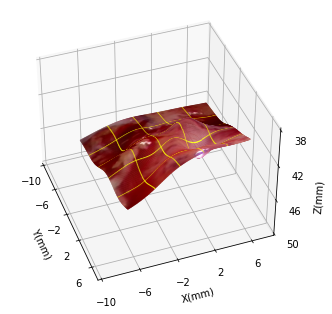

3


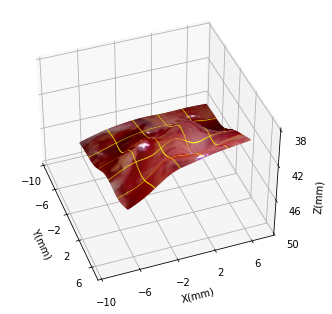

4


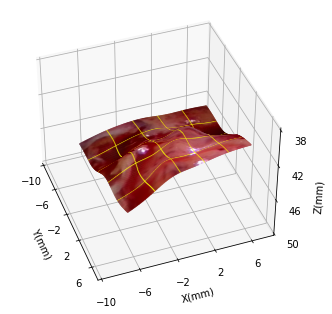

5


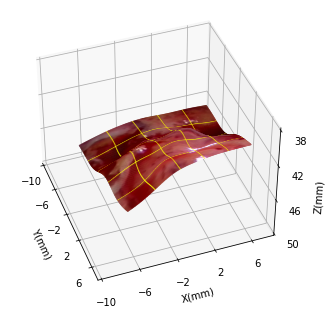

6


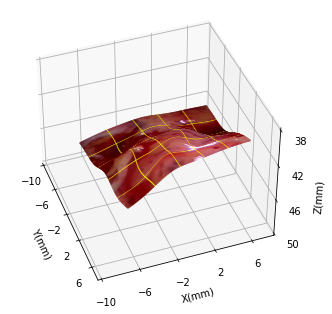

7


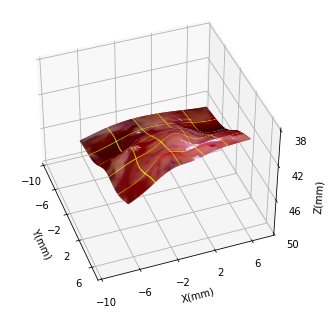

8


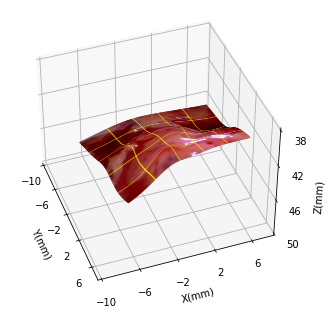

9


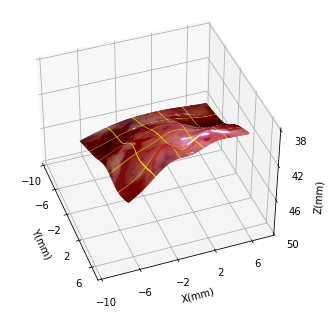

10


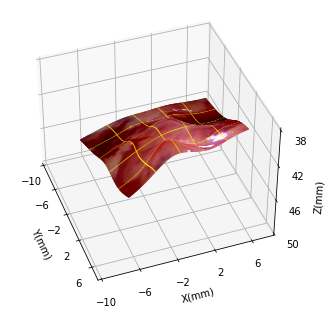

11


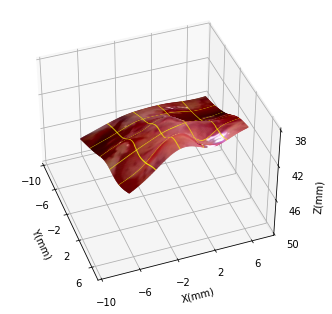

12


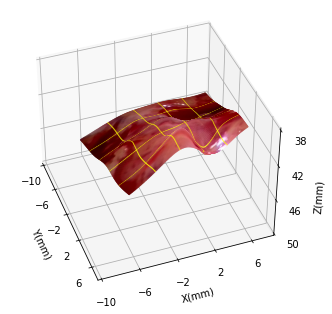

13


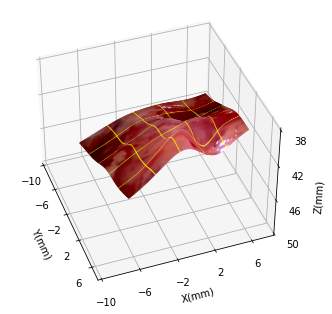

14


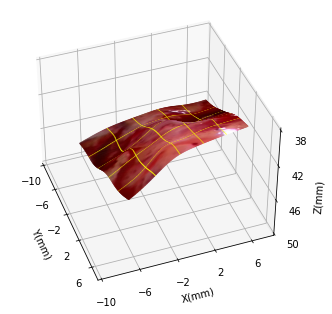

15


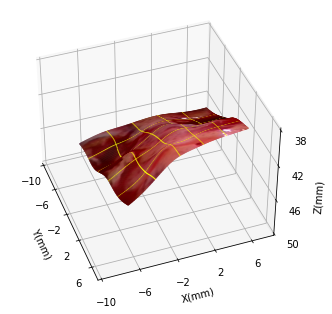

16


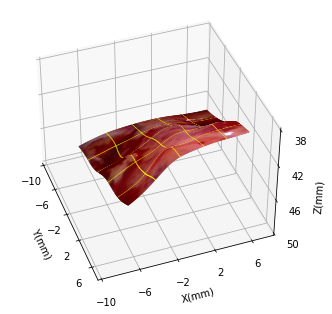

17


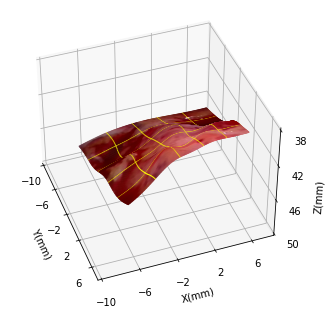

18


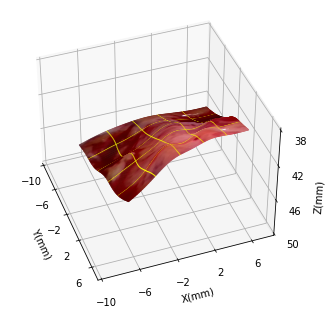

19


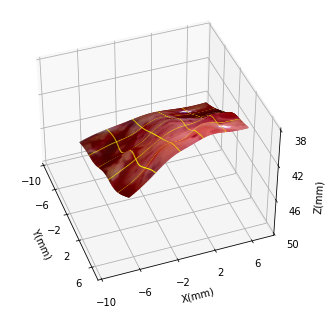

20


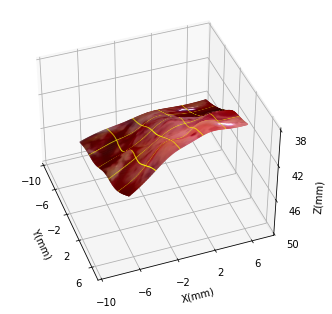

21


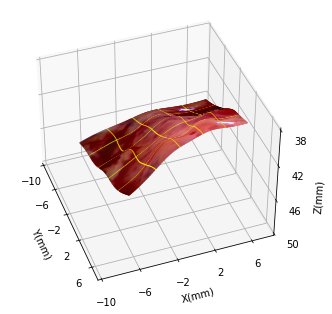

22


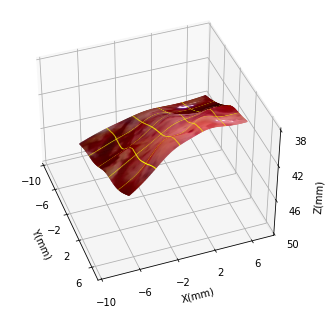

23


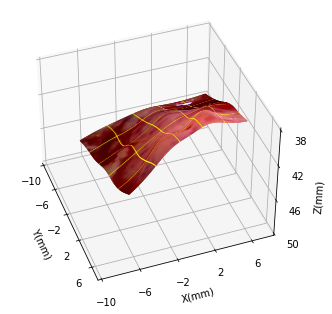

24


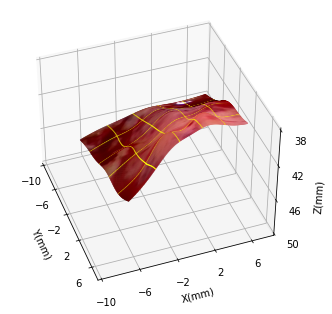

25


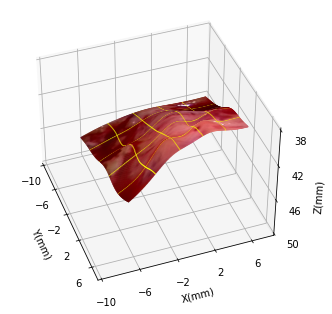

26


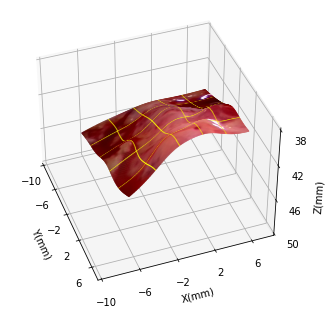

27


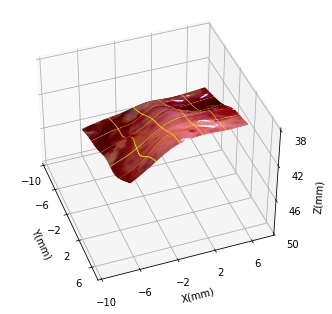

28


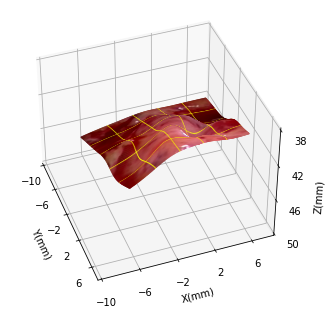

29


In [ ]:
import numpy as np
import time
from collections import namedtuple
from read_images import *

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matrix = np.mat( [[649.78255154,   0.,         143.00123024  ],
                 [  0.,         649.78255154,  155.0463047   ],
                 [  0.,           0.,           1.           ]])
print(matrix)


def cal_xyz(disps,right_ims,batch_size,img_size,x0, y0):
    b = 5.49238
    #x = b*ur/d
    #y = b*vr/d
    #z = b*f/d
    x = np.array([i for i in range(1,1+img_size)])
    y = np.array([i for i in range(1,1+img_size)])
    X, Y = np.meshgrid(x, y)

    X = X + y0
    Y = Y + x0

    X = np.expand_dims(X, [0,3])
    Y = np.expand_dims(Y, [0,3])

    X = np.tile(X,[batch_size,1,1,1])
    Y = np.tile(Y,[batch_size,1,1,1])
    
    out_X = 5.49238*(X - 143.00123024)/disps
    out_Y = 5.49238*(Y - 155.0463047)/disps
    out_Z = 5.49238*649.78255154/disps
    out_I = right_ims/255
    
    #temp = out_I[:,:,:,0].copy()
    #out_I[:,:,:,0] = out_I[:,:,:,2]
    #out_I[:,:,:,2] = temp
    return out_X,out_Y,out_Z,out_I

source_img_path = '/home/ubuntu/jupyter_workspace/dataset/real_heart/invivo1_rect/'

batch_size = 100
img_size = 200

x0 = 54
y0 = 42

for i in range(2,3):
    ids  = range(i*batch_size,(i+1)*batch_size)
    left_ims, right_ims = read_stereo_images(source_img_path, ids)#50 256 256 3
    left_ims = left_ims[:,x0:(x0+img_size),y0:(y0+img_size),:]
    right_ims = right_ims[:,x0:(x0+img_size),y0:(y0+img_size),:]#[:,48:288,0:240,:]
    point_jihe = [i for i in range(40,200,40)]##右图加黄线
    #point_jihe = [i for i in range(33,190,33)]##右图加黄线
    for k in range(len(right_ims)):
        for l in range(200):
            for j in range(200):
                if (l in point_jihe) or (j in point_jihe):
                    right_ims[k][l][j] = [255.0,255.0,0.0]
    #plt.figure("Image") # 图像窗口名称
    #plt.imshow(right_ims[52]/255)
    #plt.show()
    
    #disps = np.load('./groundtruth_z//W_disp_batch'+str(i)+'.npy')[:,32:288,14:270,:]###stylegan的
    #disps = np.load('./groundtruth_z//PSM_disp_batch.npy')[:,32:288,14:270,:]##PSM的
    #disps = np.load('./out/suiji_disps.npy')###测试随机的
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/groundtruth_z//disp_batch_invivo20'+str(i)+'.npy')[:,x0:(x0+img_size),y0:(y0+img_size),:]#TPS的
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/groundtruth_z//disp_batch_invivo20t'+str(i)+'.npy')[:,44:244,6:206,:]#学姐TPS结果
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output//disp_batch_invivo20_'+str(i)+'.npy')[:,44:244,6:206,:]#学姐
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output//out_dd.npy')[:,x0:(x0+img_size),y0:(y0+img_size),:]#学姐交替结果
    #disps = np.load('/home/ubuntu/jupyter_workspace/stylegan2-master/groundtruth_z//W_disp_batch80.npy')[0:1,32:288,14:270,:]
    disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output//TPSdisp_per_img_base55.npy')[:,x0:(x0+img_size),y0:(y0+img_size),:]
    print(left_ims.shape)
    print(disps.shape)
    
    
    shijie_position_x,shijie_position_y,shijie_position_z,shijie_position_i = cal_xyz(disps,right_ims,batch_size,img_size,x0,y0)
    
    shijie_position_x = shijie_position_x.reshape([batch_size,-1])
    shijie_position_y = shijie_position_y.reshape([batch_size,-1])
    shijie_position_z = shijie_position_z.reshape([batch_size,-1])
    shijie_position_i = shijie_position_i.reshape([batch_size,-1,3])
    ##四角处理
    
    for j in range(batch_size):
        print(j)
        #fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        #ax.scatter(shijie_position_y[j], shijie_position_x[j], -shijie_position_z[j], c=shijie_position_i[j], alpha=1)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter3D(shijie_position_y[j], shijie_position_x[j], -shijie_position_z[j], c=shijie_position_i[j],s = 0.1, 
                     norm = 1, alpha=1)

        ax.set_xlim(-10, 7.5)
        ax.set_ylim(-10, 8)
        ax.set_zlim(-50, -38)
        ax.view_init(elev=40., azim=-20.) 
        
        ax.set_xlabel('Y(mm)')
        ax.set_ylabel('X(mm)')
        ax.set_zlabel('Z(mm)')
        
        ax.set_xticks([i for i in range(-10,10,4)])
        ax.set_yticks([i for i in range(-10,10,4)])
        ax.set_zticks([-50,-46,-42,-38])
        ax.set_zticklabels(['50','46','42','38'])
        
        plt.savefig('./out/3D_SURFACE//3D'+str((i-0)*batch_size+j)+'.png', dpi = 200, bbox_inches = 'tight',pad_inches = 0)
        plt.show()

In [ ]:
10 88

In [7]:
import numpy as np

x = np.array([i for i in range(1,201)])
y = np.array([i for i in range(1,201)])
X, Y = np.meshgrid(x, y)

X = X + 6
Y = Y + 44

X = np.expand_dims(X, [0,3])
Y = np.expand_dims(Y, [0,3])

X = np.tile(X,[50,1,1,1])
Y = np.tile(Y,[50,1,1,1])

print(X.shape)
print(Y.shape)

def cal_xyz(disps,right_ims,batch_size,img_size):
    b = 5.49238
    #x = b*ur/d
    #y = b*vr/d
    #z = b*f/d
    shijie_position_x = np.zeros([batch_size,img_size*img_size])##x
    shijie_position_y = np.zeros([batch_size,img_size*img_size])##y
    shijie_position_z = np.zeros([batch_size,img_size*img_size])##z
    shijie_position_i = []##亮度
    #point_jihe = [i for i in range(40,200,40)]##右图加黄线
    for i in range(batch_size):
        shijie_position_i.append([])
        for x in range(img_size):#hang
            for y in range(img_size):#lie
                shijie_position_x[i,img_size*x+y] = 5.49238*(x-155.04+14.)/abs(disps[i,x,y,0])##lie
                shijie_position_y[i,img_size*x+y] = 5.49238*(y-143.00+32.)/abs(disps[i,x,y,0])##hang
                shijie_position_z[i,img_size*x+y] = 5.49238*649.78/abs(disps[i,x,y,0])
                
                    #r = hex(int(right_ims[i,x,y,0]))[2:]
                    #b = hex(int(right_ims[i,x,y,1]))[2:]
                    #g = hex(int(right_ims[i,x,y,2]))[2:]
                    #if len(r) == 1:
                    #    r = '0' + r
                    #if len(b) == 1:
                    #    b = '0' + b
                    #if len(g) == 1:
                    #    g = '0' + g
                    
                    #col = '#' + r + b + g
                col = [right_ims[i,x,y,0]/255, right_ims[i,x,y,1]/255, right_ims[i,x,y,2]/255]
                shijie_position_i[i].append(col)

    return shijie_position_x,shijie_position_y,shijie_position_z,shijie_position_i


[[14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 ...
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]]
(50, 200, 200, 1)
(50, 200, 200, 1)


In [4]:
a = [i for i in range(40,200,40)]
print(a)
r = hex(255)[2:]
print(r)

[40, 80, 120, 160]
0xff


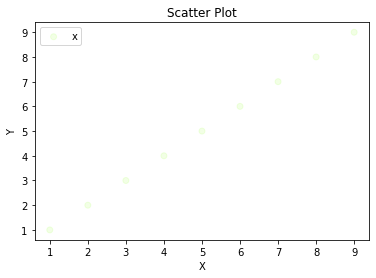

In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
#产生测试数据  
x = np.arange(1,10)  
y = x  
z = []
for i in range(9):
    z.append([0.5,1,0])
z = np.array(z)
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
#设置标题  
ax1.set_title('Scatter Plot')  
#设置X轴标签  
plt.xlabel('X')  
#设置Y轴标签  
plt.ylabel('Y')  
#画散点图  
ax1.scatter(x,y,c = z,marker = 'o', alpha=0.1)  
#设置图标  
plt.legend('x1')  
#显示所画的图  
plt.show() 

In [4]:
import numpy as np

import scipy.io as io


disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output//out_dd.npy')[:,44:244,6:206,:]

disp = disps[52]

io.savemat('disp52.mat', {'disp':disp})


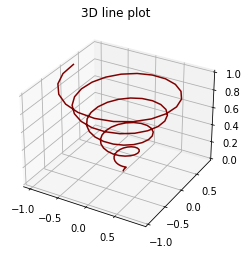

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
z = np.linspace(0, 1, 100)
x = z * np.sin(30 * z)
y = z * np.cos(30 * z)

ax.plot3D(x, y, z, 'maroon')
ax.set_title('3D line plot')
plt.show()